In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

mnist= keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [2]:
train_images= train_images.reshape((60000, 28, 28, 1))
test_images= test_images.reshape((10000, 28, 28, 1))

train_images= train_images / 255.0
test_images= test_images / 255.0

model= models.Sequential()

# filter 개수: 32, filter size= (3, 3)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu',))

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer= 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc= model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 49s 25ms/step - loss: 0.7386 - accuracy: 0.7336
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0841 - accuracy: 0.9823
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0476 - accuracy: 0.9886
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0349 - accuracy: 0.9905
Epoch 5/5
313/313 [==============================] - 4s 11ms/step - loss: 0.0336 - accuracy: 0.9915


In [6]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [11]:
from IPython.display import HTML
HTML(input_form + javascript)

In [12]:
x= np.reshape([image], [1, 28, 28])
x= np.expand_dims(x, axis=3)
print(x.shape)

(1, 28, 28, 1)


<BarContainer object of 10 artists>

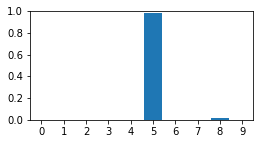

In [13]:
p_val= model.predict(x)

fig= plt.figure(figsize=(4, 2))
pred= p_val[0]
subplot= fig.add_subplot(1, 1, 1)
subplot.set_xticks(range(10))
subplot.set_xlim(-0.5, 9.5)
subplot.set_ylim(0, 1)
subplot.bar(range(10), pred, align='center')